<a href="https://colab.research.google.com/github/premkumar25/Kidney-Disease-Prediction/blob/main/Chronic_kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('kidney_disease.csv', index_col='id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

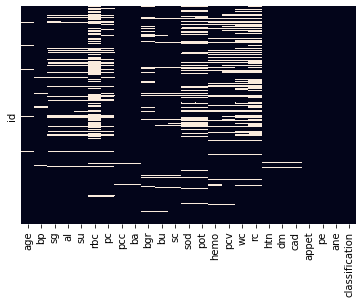

In [44]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [78]:
#Rename the columns to have meaningful names
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}
df.rename(columns=col_dict, inplace=True)

In [79]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [47]:
numerical = []
categorical = []
for i in df.columns:
  if (df[i].dtypes)=='O':
    categorical.append(i)
  else:
    numerical.append(i)

In [80]:
for i in df.columns:
  print(i,df[i].unique())

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
blood_pressure [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
specific_gravity [1.02  1.01  1.005 1.015   nan 1.025]
albumin [ 1.  4.  2.  3.  0. nan  5.]
sugar [ 0.  3.  4.  1. nan  2.  5.]
red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
blood_glucose_random [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 

In [81]:
#df.replace('\t?',np.nan,inplace=True)
df.replace(to_replace={'\t43':'43','\t6200':'6200','\t8400':'8400','\t?':np.nan,'ckd\t':1,'ckd':1,'notckd':0},inplace=True)

In [84]:
map_values = {'normal':0,'abnormal':1,'notpresent':0,'present':1,'yes':1,'no':0,'\tno':0,'\tyes':1,' yes':1,'good':1,'poor':0}
df.replace(to_replace=map_values,inplace=True)

In [86]:
df_copy = df.copy()
df_copy.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [87]:
from sklearn.impute import KNNImputer

In [88]:
imputer = KNNImputer(missing_values=np.nan)
df =pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [89]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.2,0.0,0.0,0.0,121.0,36.0,1.2,137.6,4.20,15.4,44.0,7800.0,5.20,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.4,0.0,0.0,0.0,113.0,18.0,0.8,136.8,3.92,11.3,38.0,6000.0,4.96,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,3.80,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60,0.0,0.0,0.0,1.0,0.0,0.0,1.0


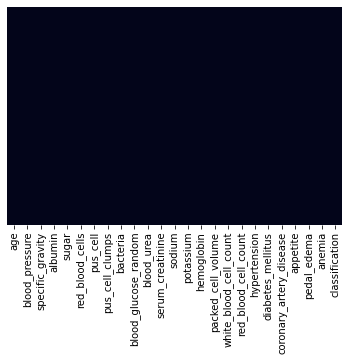

In [90]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [91]:
df.astype(float)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.2,0.0,0.0,0.0,121.0,36.0,1.2,137.6,4.20,15.4,44.0,7800.0,5.20,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.4,0.0,0.0,0.0,113.0,18.0,0.8,136.8,3.92,11.3,38.0,6000.0,4.96,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,3.80,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,150.0,4.90,15.7,47.0,6700.0,4.90,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,31.0,1.2,141.0,3.50,16.5,54.0,7800.0,6.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,26.0,0.6,137.0,4.40,15.8,49.0,6600.0,5.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,50.0,1.0,135.0,4.90,14.2,51.0,7200.0,5.90,0.0,0.0,0.0,1.0,0.0,0.0,0.0


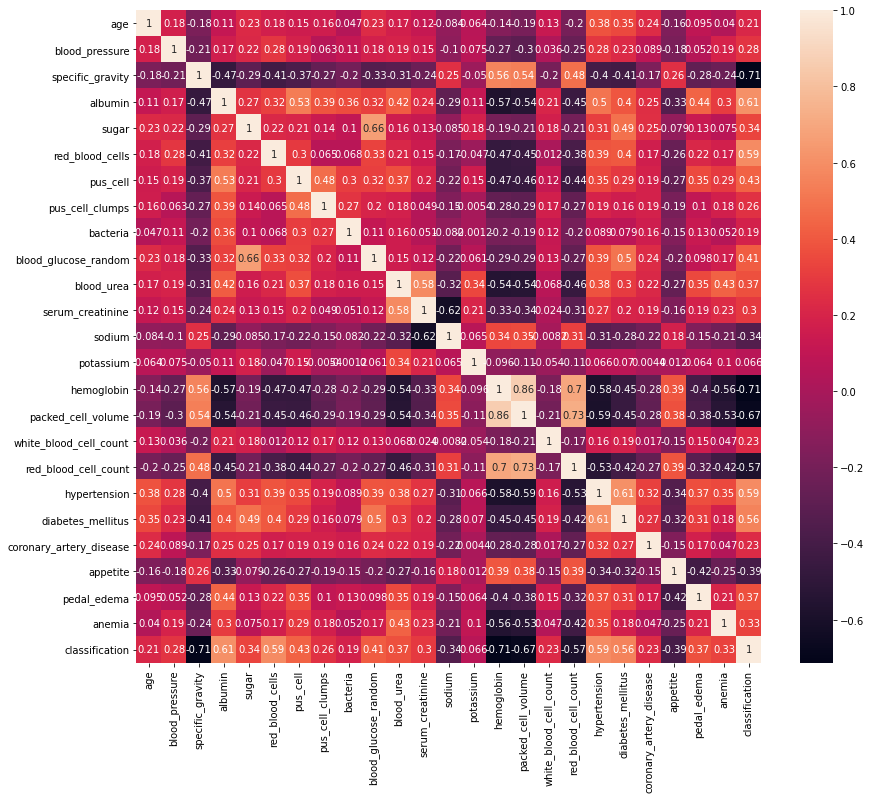

In [93]:
df_corr = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(df_corr,annot=True)

In [95]:
df = df.drop(['potassium'],axis=1)              ## coorelation to output is very less so dropped

In [32]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,138.0,15.4,44,7800,5.2,1,1,0,1,0,0,1.0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,18.0,0.8,138.0,11.3,38,6000,5.2,0,0,0,1,0,0,1.0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,138.0,9.6,31,7500,5.2,0,1,0,0,0,1,1.0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,11.2,32,6700,3.9,1,0,0,0,1,1,1.0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,138.0,11.6,35,7300,4.6,0,0,0,1,0,0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f37665a20>,
      dtype=object)

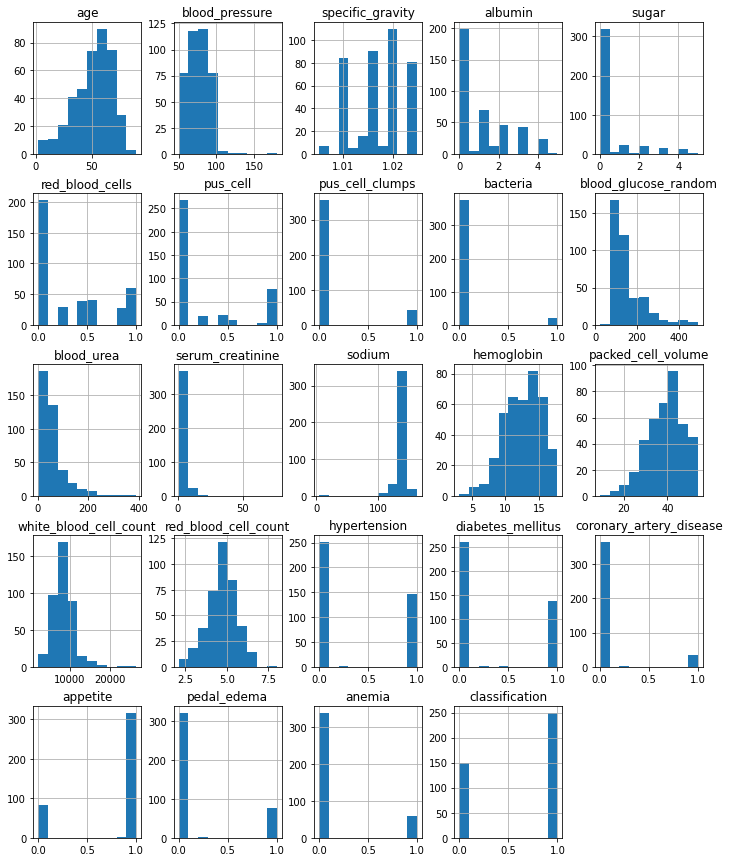

In [98]:
df.hist(figsize=(12,15))

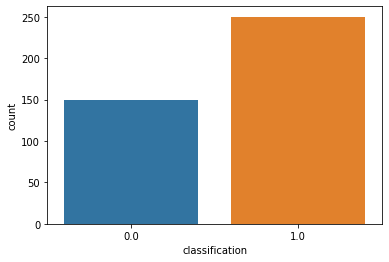

In [103]:
sns.countplot(df['classification'])

In [100]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
source = df.drop('classification',axis=1)
target = df['classification']

In [102]:
clf = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), XGBClassifier()]

for i in clf:
  score = cross_val_score(i,source, target, scoring='accuracy')
  print(i,'\nAccuracy is',score.mean()*100)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
Accuracy is 89.0
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
Accuracy is 96.74999999999999
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max

In [104]:
X_train,X_test,y_train,y_test = train_test_split(source,target,test_size=0.33)

In [105]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [107]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score)
print(cm)

1.0
[[50  0]
 [ 0 82]]


In [115]:
result = []
y_real = list(y_test)
for i in range(len(y_real)):
  result.append([y_real[i],y_pred[i]])
result

[[0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.0, 1.0],
 [1.0, 1.0],